In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,precision_score, f1_score, roc_auc_score
from sklearn.tree import plot_tree
from scipy.stats import mode

In [2]:
df = pd.read_excel('/content/drive/MyDrive/semester 5_Data Mining/UAS/parkinson disease/Parkinsson disease.xlsx')

In [5]:
print(df.shape)

(1727, 24)


In [3]:
print(df.shape)
print(df.info())
df.head()

(1727, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1727 non-null   object 
 1   MDVP:Fo(Hz)       1727 non-null   float64
 2   MDVP:Fhi(Hz)      1727 non-null   float64
 3   MDVP:Flo(Hz)      1727 non-null   float64
 4   MDVP:Jitter(%)    1727 non-null   float64
 5   MDVP:Jitter(Abs)  1727 non-null   float64
 6   MDVP:RAP          1727 non-null   float64
 7   MDVP:PPQ          1727 non-null   float64
 8   Jitter:DDP        1727 non-null   float64
 9   MDVP:Shimmer      1727 non-null   float64
 10  MDVP:Shimmer(dB)  1727 non-null   float64
 11  Shimmer:APQ3      1727 non-null   float64
 12  Shimmer:APQ5      1727 non-null   float64
 13  MDVP:APQ          1727 non-null   float64
 14  Shimmer:DDA       1727 non-null   float64
 15  NHR               1727 non-null   float64
 16  HNR               1727 non-null

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,...,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,152.373653,184.306463,119.073948,0.005553,0.000041,0.002853,0.003151,0.008558,0.029437,0.275344,...,0.046934,0.017709,22.484781,0.746381,0.492088,0.733482,-5.772803,0.224790,2.336633,0.203906
std,42.112268,70.141457,46.325769,0.003300,0.000028,0.001913,0.002004,0.005738,0.016384,0.163620,...,0.026924,0.024118,4.145065,0.435208,0.098829,0.055243,1.086093,0.084247,0.379306,0.091132
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,116.879000,134.656000,83.159000,0.003210,0.000020,0.001580,0.001760,0.004740,0.016630,0.154000,...,0.025660,0.004790,20.264000,0.000000,0.427627,0.690892,-6.617876,0.175181,2.079922,0.133867
50%,146.845000,168.913000,106.981000,0.004760,0.000030,0.002370,0.002580,0.007100,0.023430,0.216000,...,0.039690,0.010360,22.603000,1.000000,0.489538,0.734504,-5.775966,0.220890,2.322511,0.193918
75%,178.222000,211.350000,144.786000,0.007420,0.000060,0.003700,0.004150,0.011090,0.038860,0.361000,...,0.062190,0.019290,25.368000,1.000000,0.576084,0.775933,-5.092654,0.269866,2.517871,0.260375
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [6]:
df['status'].value_counts()

,count
status,
1,1289
0,438


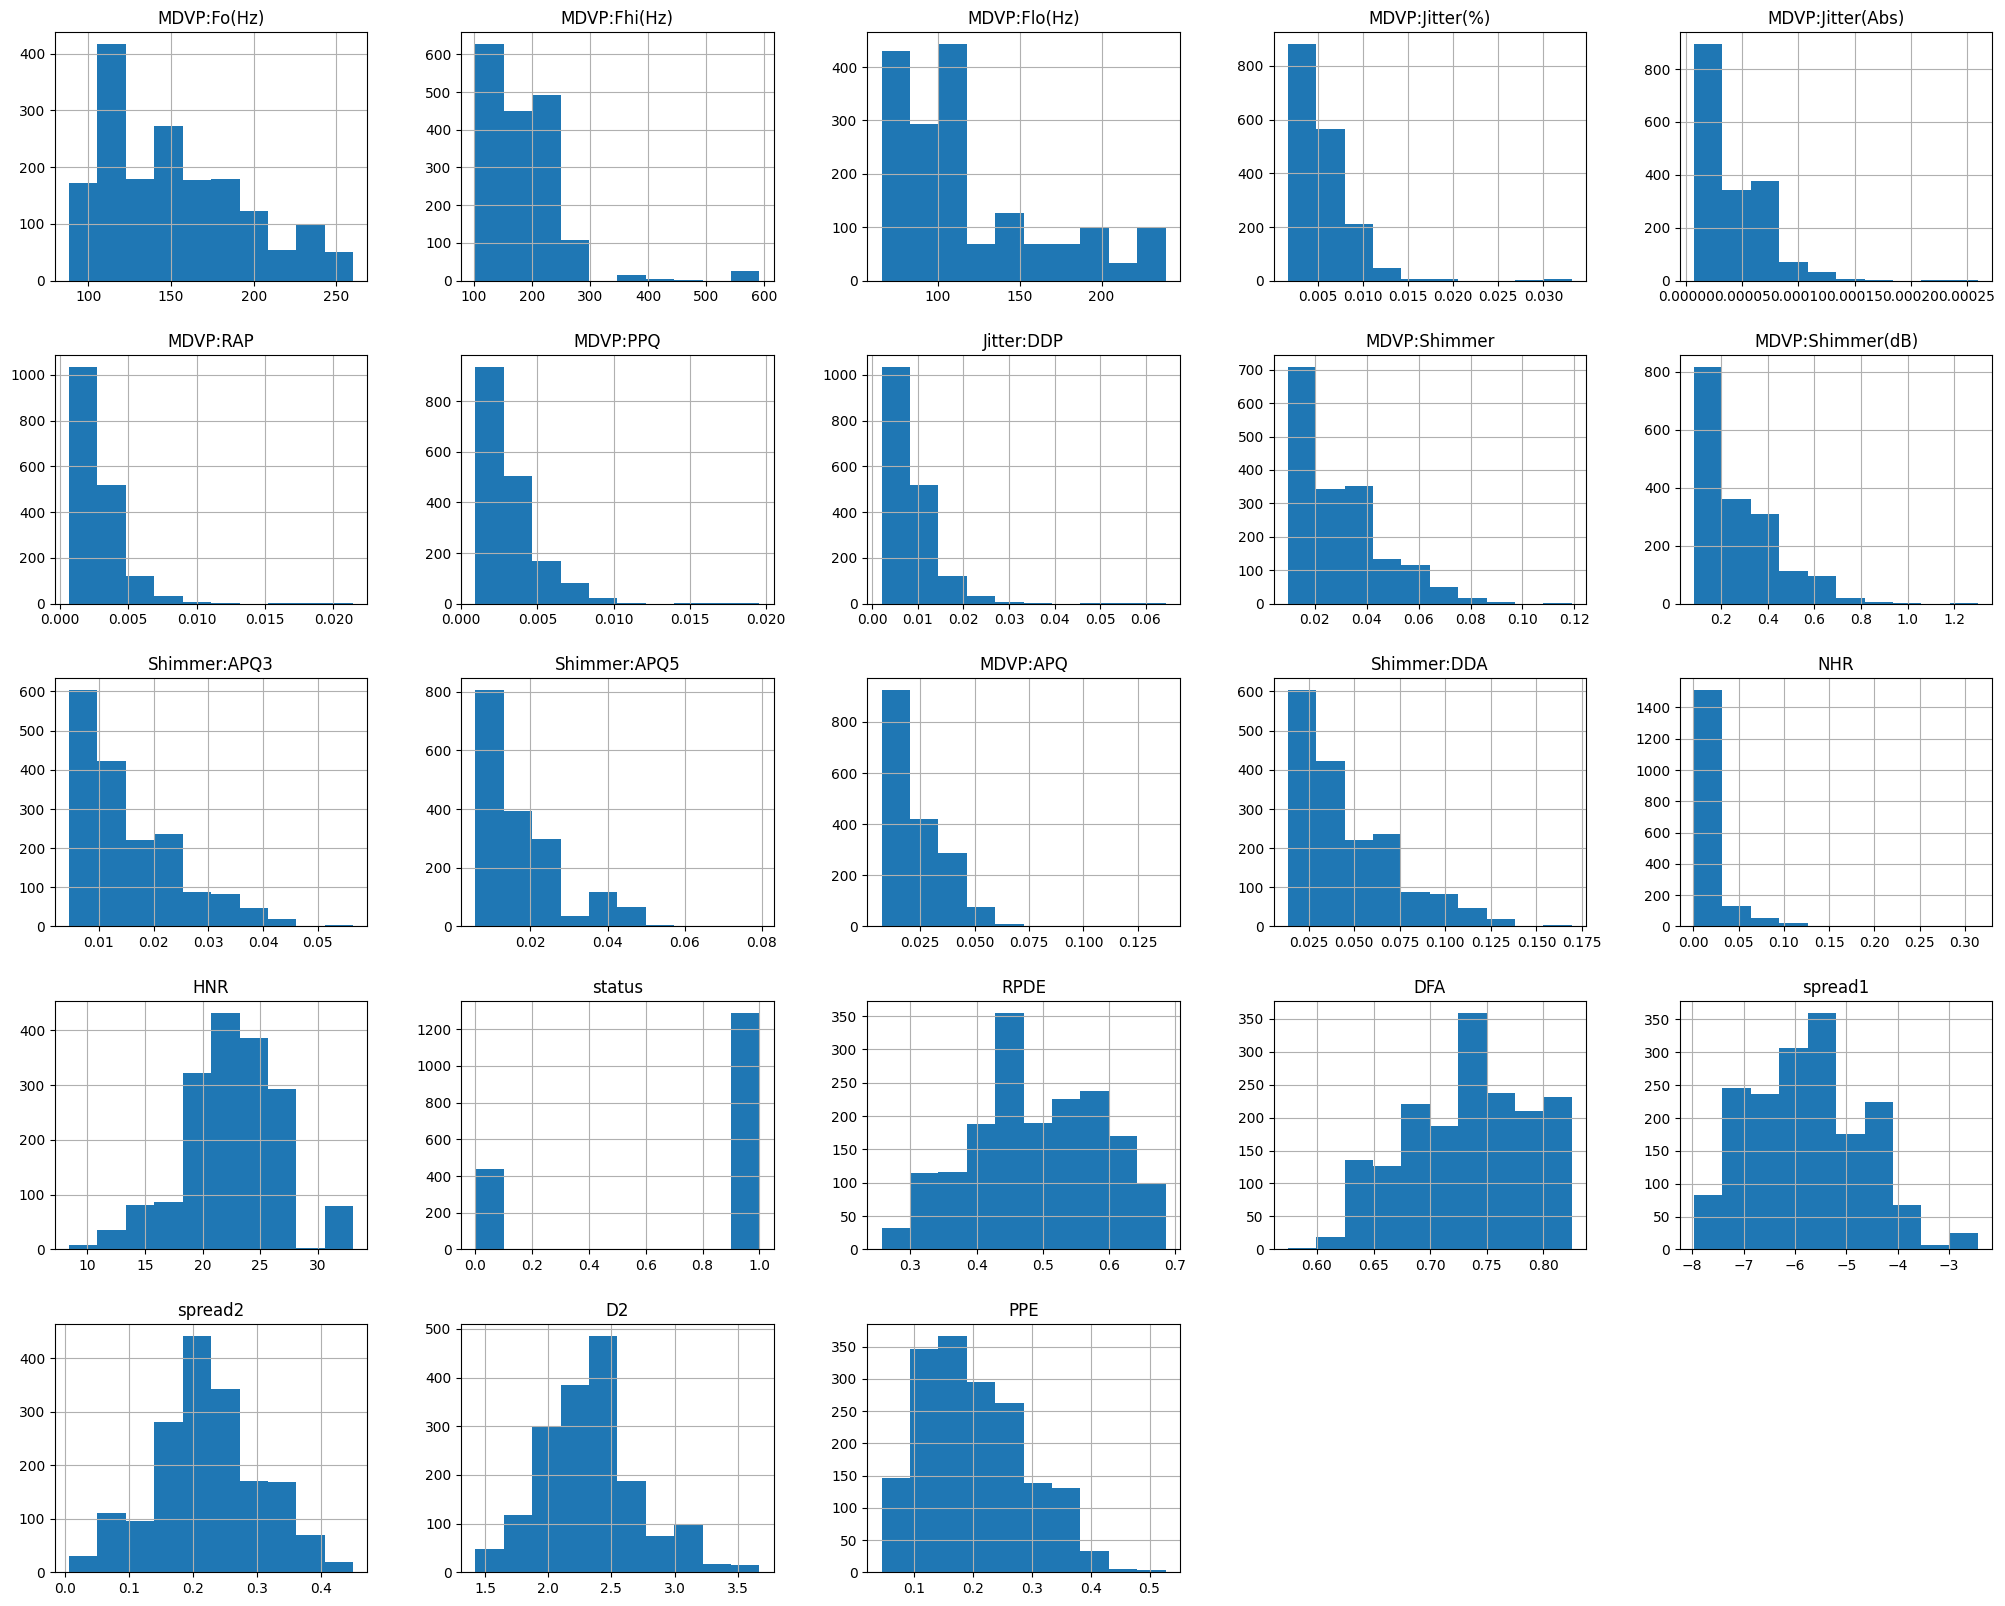

In [7]:
df.hist(figsize=(25,20));

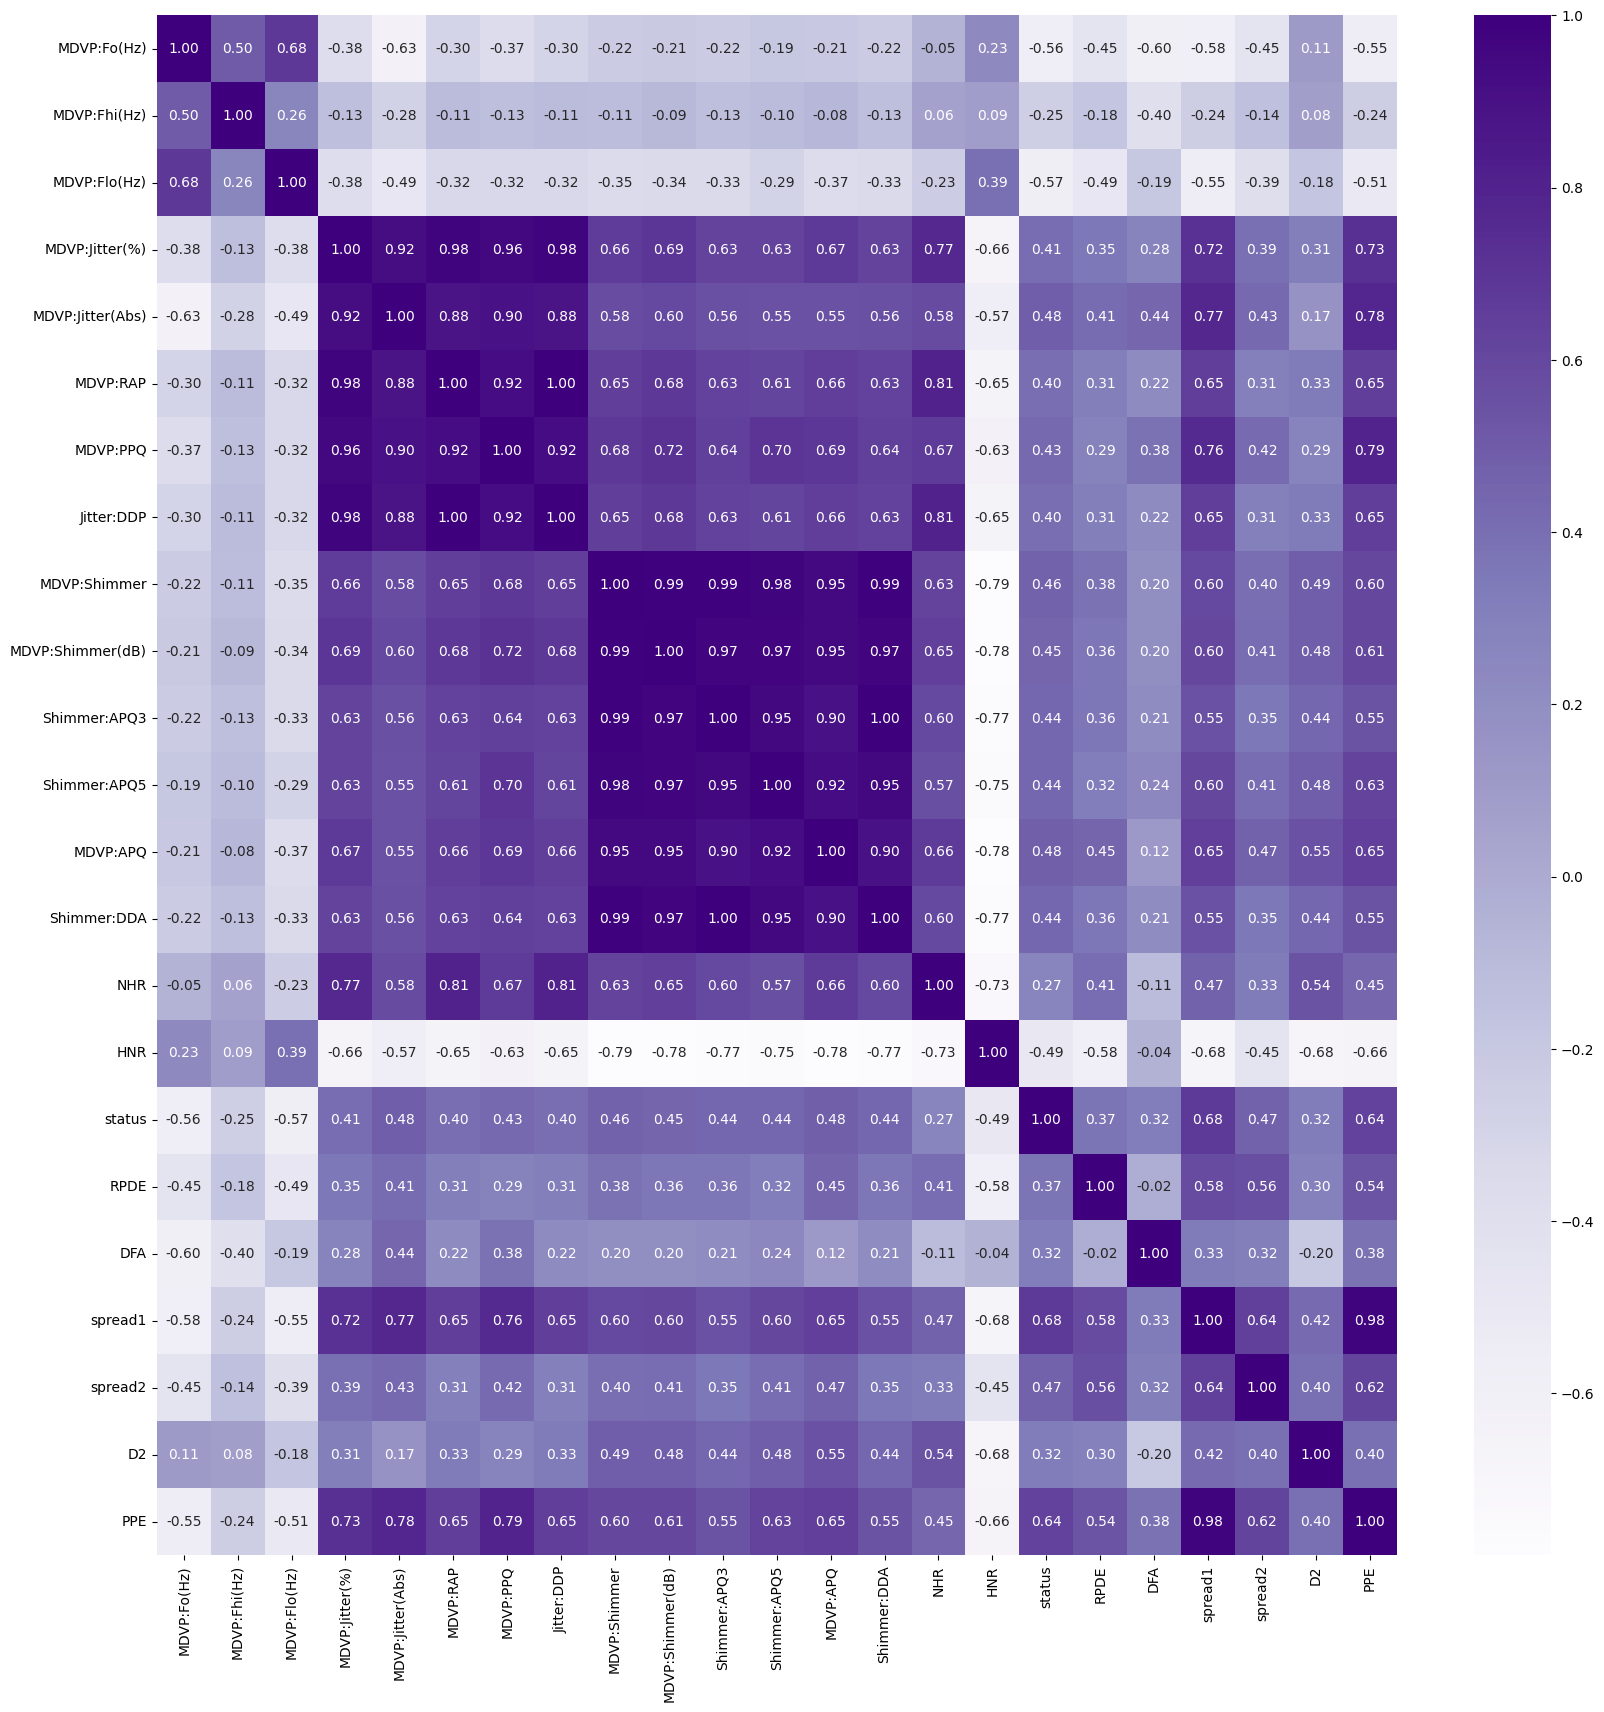

In [8]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Purples", fmt=".2f")
plt.show()

Normalisasi data

In [13]:
# Assuming 'status' is your target variable and the rest are features
X = df.drop(["status", "name"], axis=1)  # Explicitly drop the 'name' column if present
# Now you can apply scaling:
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0.404536,0.144585,0.016840,0.060356,0.051383,0.061657,0.055734,0.061487,0.252145,0.182416,...,0.156597,0.309475,0.024986,0.559945,0.573544,0.549341,0.309813,0.409217,0.320554,0.240817
1723,0.402359,0.124768,0.484352,0.063850,0.051383,0.064066,0.056270,0.063895,0.211612,0.162695,...,0.141818,0.261587,0.030334,0.538568,0.444992,0.523398,0.310599,0.392270,0.409749,0.249317
1724,0.412075,0.136293,0.456752,0.055273,0.051383,0.052987,0.049303,0.053139,0.221563,0.182416,...,0.160043,0.260175,0.025050,0.577989,0.256099,0.474678,0.279797,0.424009,0.467088,0.221963
1725,0.213673,0.085328,0.291956,0.353240,0.367589,0.325145,0.284566,0.324932,0.267665,0.211175,...,0.181407,0.323662,0.257377,0.280297,0.870323,0.558564,0.713248,0.583138,0.555432,0.613229


In [14]:
from collections import Counter
from sklearn.model_selection import train_test_split

In [15]:
# Split data
# Assuming 'status' is your target variable, define y before using it
y = df['status']  # Define y as the 'status' column from your DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran Data Latih: {X_train.shape}, Ukuran Data Uji: {X_test.shape}")

Ukuran Data Latih: (1381, 22), Ukuran Data Uji: (346, 22)


In [16]:
print(X_train)

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
107      0.369973      0.113537      0.393076        0.028590   
900      0.325169      0.504433      0.099531        0.119441   
1708     0.045252      0.013307      0.109584        0.167090   
705      0.396293      0.178109      0.445300        0.190597   
678      0.370386      0.124907      0.470655        0.079733   
...           ...           ...           ...             ...   
1130     0.412075      0.136293      0.456752        0.055273   
1294     0.779539      0.263735      0.806125        0.031131   
860      0.130254      0.041777      0.227590        0.110546   
1459     0.432172      0.196375      0.069974        0.106099   
1126     0.348945      0.128283      0.442289        0.092440   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
107           0.051383  0.022640  0.016077    0.022797      0.045280   
900           0.130435  0.068882  0.107181    0.068711      0.099781   
170

In [17]:
print(y_train)

107     1
900     1
1708    1
705     1
678     1
       ..
1130    1
1294    0
860     1
1459    1
1126    1
Name: status, Length: 1381, dtype: int64


seleksi fitur

In [18]:
# Menentukan data X dan y
# The 'name' column has likely already been removed, so only drop 'status'
X = df.drop(["status", "name"], axis=1)  # Explicitly drop the 'name' column if present
y = df["status"]

# ... (rest of your code) ...

# Hitung korelasi antara setiap fitur dan target
correlation = X.corrwith(y)
print(correlation)

MDVP:Fo(Hz)        -0.561985
MDVP:Fhi(Hz)       -0.248930
MDVP:Flo(Hz)       -0.574260
MDVP:Jitter(%)      0.410573
MDVP:Jitter(Abs)    0.483587
MDVP:RAP            0.402748
MDVP:PPQ            0.431241
Jitter:DDP          0.402837
MDVP:Shimmer        0.463516
MDVP:Shimmer(dB)    0.451633
Shimmer:APQ3        0.439272
Shimmer:APQ5        0.440638
MDVP:APQ            0.480911
Shimmer:DDA         0.439276
NHR                 0.270468
HNR                -0.491311
RPDE                0.374460
DFA                 0.318137
spread1             0.675079
spread2             0.469929
D2                  0.323753
PPE                 0.636712
dtype: float64


In [18]:
relevant_features = correlation[(correlation > 0.1) | (correlation < -0.1)]
print(relevant_features)

MDVP:Fo(Hz)        -0.561985
MDVP:Fhi(Hz)       -0.248930
MDVP:Flo(Hz)       -0.574260
MDVP:Jitter(%)      0.410573
MDVP:Jitter(Abs)    0.483587
MDVP:RAP            0.402748
MDVP:PPQ            0.431241
Jitter:DDP          0.402837
MDVP:Shimmer        0.463516
MDVP:Shimmer(dB)    0.451633
Shimmer:APQ3        0.439272
Shimmer:APQ5        0.440638
MDVP:APQ            0.480911
Shimmer:DDA         0.439276
NHR                 0.270468
HNR                -0.491311
RPDE                0.374460
DFA                 0.318137
spread1             0.675079
spread2             0.469929
D2                  0.323753
PPE                 0.636712
dtype: float64


In [19]:
X = X[relevant_features.index]

In [20]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,157.821,172.975,68.401,0.00358,0.00002,0.00196,0.00196,0.00587,0.03716,0.307,...,0.02764,0.06185,0.00850,22.219,0.502380,0.712170,-6.251425,0.188056,2.143851,0.160812
1723,157.447,163.267,149.605,0.00369,0.00002,0.00201,0.00197,0.00602,0.03272,0.283,...,0.02571,0.05439,0.01018,21.693,0.447285,0.705658,-6.247076,0.180528,2.344348,0.164916
1724,159.116,168.913,144.811,0.00342,0.00002,0.00178,0.00184,0.00535,0.03381,0.307,...,0.02809,0.05417,0.00852,22.663,0.366329,0.693429,-6.417440,0.194627,2.473239,0.151709
1725,125.036,143.946,116.187,0.01280,0.00010,0.00743,0.00623,0.02228,0.03886,0.342,...,0.03088,0.06406,0.08151,15.338,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623


In [21]:
y

,status
0,1
1,1
2,1
3,1
4,1
...,...
1722,1
1723,1
1724,1
1725,1


In [22]:
y.value_counts()

,count
status,
1,1289
0,438


melakukan SMOTE

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5)  # Rasio kelas minoritas menjadi 50% dari kelas mayoritas

In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Contoh dataset awal
print("Distribusi sebelum SMOTE:", Counter(y))

# Penerapan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Distribusi setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_resampled))

Distribusi sebelum SMOTE: Counter({1: 1289, 0: 438})
Distribusi setelah SMOTE: Counter({1: 1289, 0: 1289})


In [ ]:
Evaluasi Model

In [29]:
# Inisialisasi model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors bisa disesuaikan

# Split the resampled data
from sklearn.model_selection import train_test_split
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Latih model menggunakan data hasil SMOTE
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [30]:
# Prediksi pada data test
y_pred = knn.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 94   0]
 [  4 248]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        94
           1       1.00      0.98      0.99       252

    accuracy                           0.99       346
   macro avg       0.98      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346



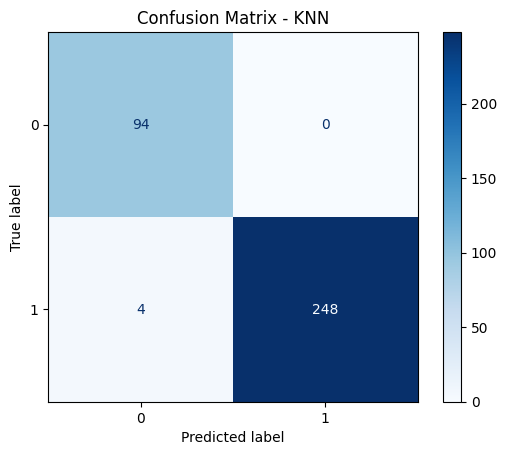

In [31]:
# Import the necessary class
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Cross-validation dengan GridSearch
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Menampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Gunakan model terbaik
best_knn = grid_search.best_estimator_


Best Parameters: {'n_neighbors': 3}
Best Score: 0.9932085850631186


Confusion Matrix - Best KNN:
[[ 94   0]
 [  4 248]]

Classification Report - Best KNN:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        94
           1       1.00      0.98      0.99       252

    accuracy                           0.99       346
   macro avg       0.98      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346



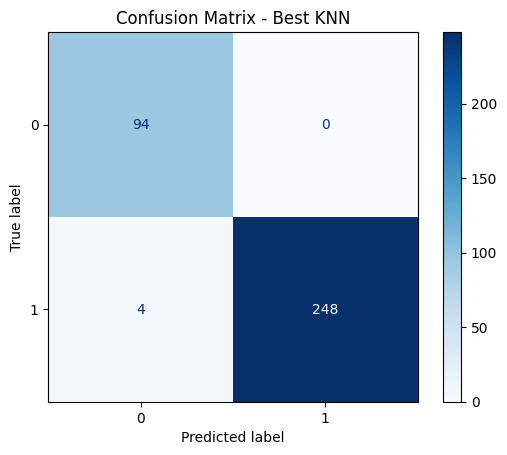

In [34]:
# Prediksi dengan model terbaik
y_pred_best = best_knn.predict(X_test)

# Evaluasi model
print("Confusion Matrix - Best KNN:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report - Best KNN:")
print(classification_report(y_test, y_pred_best))

# Visualisasi confusion matrix
ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Best KNN")
plt.show()
